In [4]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import gzip

# **Q1 PCA Analysis**

In [27]:
## Script 1 - given in the assignment

# Function to read pixel data from the dataset
def read_pixels(data_path):
    with gzip.open(data_path) as f:
        pixel_data = np.frombuffer(f.read(), 'B', offset=16).astype('float32')
    normalized_pixels = pixel_data / 255
    flattened_pixels = normalized_pixels.reshape(60000,784) # TODO: Flatten the normalized pixels
    return flattened_pixels

# Function to read label data from the dataset
def read_labels(data_path):
    with gzip.open(data_path) as f:
        label_data = np.frombuffer(f.read(), 'B', offset=8)
    return label_data

images = read_pixels("data/train-images-idx3-ubyte.gz")
labels = read_labels("data/train-labels-idx1-ubyte.gz")

images.shape, labels.shape

((60000, 784), (60000,))

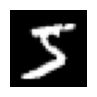

In [40]:
plt.figure(figsize = (1,1))
plt.axis('off')
plt.imshow(images[0].reshape(28,28), cmap='Greys_r')
plt.show()

##### **Question 1.1 [15 pts]**
Apply PCA on the dataset to obtain the principal components. Report the proportion of variance explained (PVE) for the first 10 principal components and discuss your results.
##### **Question 1.2 [5 pts]**
Report at least how many of the principal components should be used to explain the 70% of the data.

In [112]:
mean = np.mean(images, axis=0)
data_mn = images - mean
cov_mat = np.matmul(data_mn.T,data_mn)
eigenvalues, eigenvectors = np.linalg.eig(cov_mat)

#sort the eigenvalues in descending order
idx = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[idx]
eigenvectors = eigenvectors[:,idx]
total_variance = np.sum(eigenvalues)

#calculate the variance explained by each eigenvalue for first 10 eigenvalues
variance_explained = [(i/total_variance)*100 for i in eigenvalues]
for i in range(len(variance_explained)):
    variance_until_i = np.sum(variance_explained[:i+1])
    if i < 10:
        print(str(i+1)+'. principal component |','PVE:',variance_explained[i].round(3),'| Cumulative PVE:',variance_until_i.round(3))
    if variance_until_i >= 70:
        print('The first',str(i+1),'principal components explain more than 70% of the variance in the data:', variance_until_i.round(3))
        break

1. principal component | PVE: 9.705 | Cumulative PVE: 9.705
2. principal component | PVE: 7.096 | Cumulative PVE: 16.801
3. principal component | PVE: 6.169 | Cumulative PVE: 22.97
4. principal component | PVE: 5.389 | Cumulative PVE: 28.359
5. principal component | PVE: 4.869 | Cumulative PVE: 33.228
6. principal component | PVE: 4.312 | Cumulative PVE: 37.54
7. principal component | PVE: 3.272 | Cumulative PVE: 40.812
8. principal component | PVE: 2.884 | Cumulative PVE: 43.696
9. principal component | PVE: 2.762 | Cumulative PVE: 46.458
10. principal component | PVE: 2.357 | Cumulative PVE: 48.815
The first 26 principal components explain more than 70% of the variance in the data: 70.02


##### **Question 1.3 [10 pts]**
Using the first 10 principal components found in Question 1.1, reshape each principal component to a 28 × 28 matrix. Apply min-max scaling to each principal component to set the range of the values to [0,1] so that the principal components can be visualized. After scaling, display the obtained grayscale principal component images of size 28 × 28. Discuss your results.

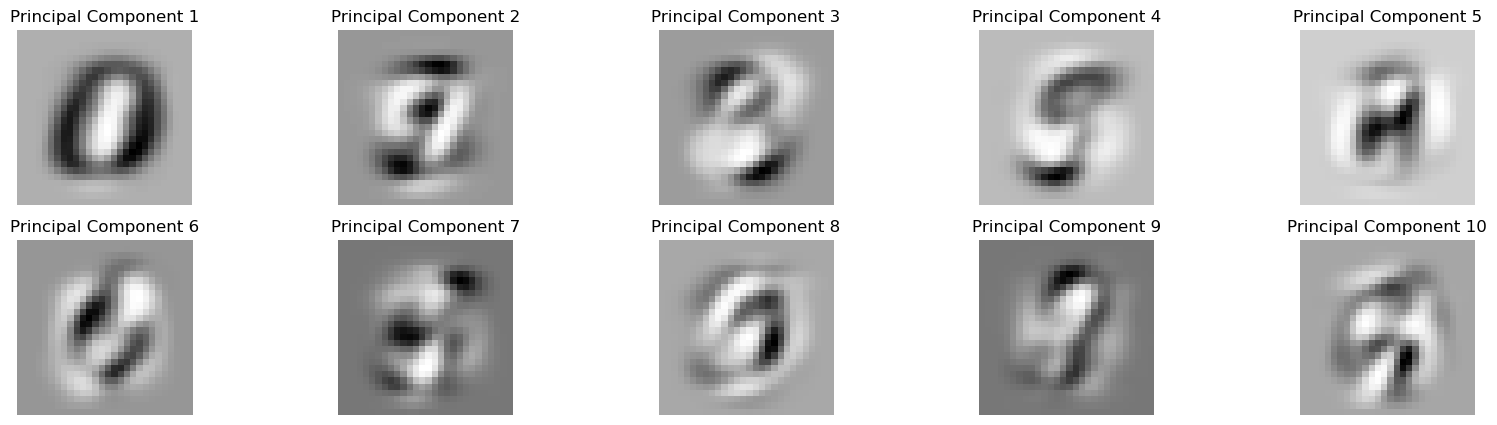

In [86]:
first_ten = eigenvectors[:,:10]
fig, axes = plt.subplots(2, 5, figsize=(20, 5))
for i, column_vector in enumerate(first_ten.T):
    max_val = np.max(column_vector)
    min_val = np.min(column_vector)
    column_vector = (column_vector - min_val) / (max_val - min_val)
    ax = axes[i // 5, i % 5]
    ax.axis('off')
    ax.imshow(column_vector.reshape(28, 28), cmap='Greys_r')
    ax.set_title('Principal Component {}'.format(i + 1))
plt.show()


##### **Question 1.4 [10 pts]**
Project the first 100 images of the dataset onto the first 2 principal components. Plot the projected data points on the 2-D space by coloring them according to the labels provided in the dataset. Label the axes by the index of their corresponding principal components. Each digit label should be colored with a different color, 10 colors in total. Discuss the distribution of the data points according to their labels by considering the visuals of the first 2 principal components found in Question 1.3.

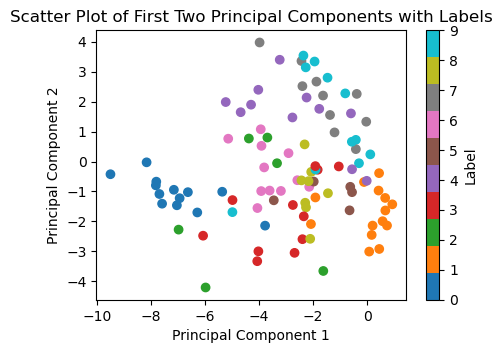

In [109]:
# Get the first 100 images and their labels
first_100_images = images[:100]
first_100_labels = labels[:100]
first_two = eigenvectors[:,:2]

# Project the first 100 images onto the first 2 principal components
projected_data = np.dot(first_100_images, first_two)

# Plot the projected data points with different colors according to their labels
plt.figure(figsize=(5, 3.5))
plt.scatter(projected_data[:, 0], projected_data[:, 1], c=first_100_labels, cmap='tab10')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter Plot of First Two Principal Components with Labels')
plt.colorbar(label='Label')
plt.show()


##### **Question 1.5 [10 pts]** 
Describe how you can reconstruct an original digit image using the principal components found in Question 1.1. Use first k principal components to analyze and reconstruct the first image in the dataset where k ∈ {1, 50, 100, 250, 500, 784}. Discuss your results.

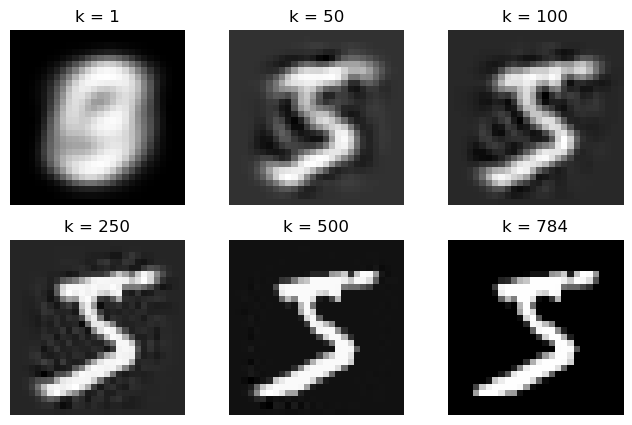

In [121]:
# Reconstruction of images
k_values = (1, 50, 100, 250, 500, 784)
fig, axes = plt.subplots(2, 3, figsize=(8, 5))
for k in k_values:  
    i = k_values.index(k)  
    #select k biggest eigenvectors
    first_k_eigen = eigenvectors[:,:k].T
    projection = np.matmul(data_mn,first_k_eigen.T)
    projection = np.matmul(projection,first_k_eigen) + mean
    #plot first images for each k value
    ax = axes[i // 3, i % 3]
    ax.axis('off')
    ax.imshow(projection[0].reshape(28,28), cmap='Greys_r')
    ax.set_title('k = '+str(k))
plt.show()